<a href="https://colab.research.google.com/github/vuducanh0802/data-mining_projects/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
df = pd.read_csv('train.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.drop(['Name'],axis=1,inplace=True)
df['Sex'].replace({'male':1,'female':0},inplace=True)
df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,1,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,0,47.0,1,0,363272,7.0000,NaN,S
2,894,2,1,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,1,27.0,0,0,315154,8.6625,NaN,S
4,896,3,0,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,1,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,0,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,1,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
df.drop(['Ticket'],axis=1,inplace = True)
df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,1,34.5,0,0,7.8292,NaN,Q
1,893,3,0,47.0,1,0,7.0000,NaN,S
2,894,2,1,62.0,0,0,9.6875,NaN,Q
3,895,3,1,27.0,0,0,8.6625,NaN,S
4,896,3,0,22.0,1,1,12.2875,NaN,S


In [ ]:
survive = df['Survived']
survive.value_counts()

0    549
1    342
Name: Survived, dtype: int64

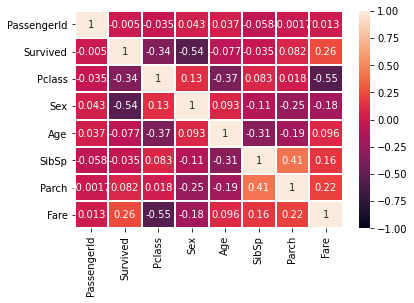

In [ ]:
sb.heatmap(df.corr(),vmin=-1,vmax=1,annot=True,fmt='.2g',linewidths=1)

In [ ]:
jointDF = pd.concat([df['Sex'],df['Survived']],axis=1).reindex(df['PassengerId'].index)
print(jointDF.corr())

               Sex  Survived
Sex       1.000000 -0.543351
Survived -0.543351  1.000000


In [ ]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


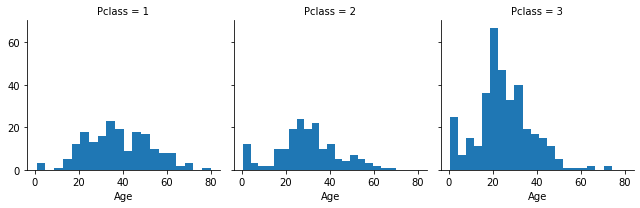

In [ ]:
g = sb.FacetGrid(df, col='Pclass')
g.map(plt.hist, 'Age', bins=20)

In [ ]:
maxnotiii = df.loc[df['Pclass']!=1]['Fare'].max()

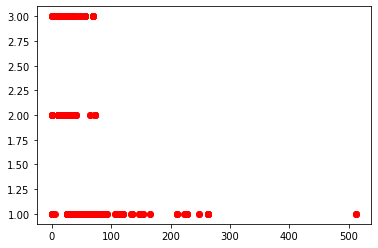

In [ ]:
plt.scatter(x='Fare',y = 'Pclass',data=df,color='red')

In [ ]:
xxx = df.loc[df['Pclass']==1]
xxx.loc[xxx['Fare']>maxnotiii]['Survived'].value_counts()

1    74
0    23
Name: Survived, dtype: int64

In [ ]:
print("Fare>400: \t Survived")
print("Fare>maxiii: \t 0.75 Survived")

Fare>400: 	 Survived
Fare>maxiii: 	 0.75 Survived


In [ ]:
pd.crosstab(df['Survived'],df['Embarked'])

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [ ]:
df.loc[(df['Parch']!=0) | (df['SibSp']!=0),'isAlone'] = 0
df.loc[(df['Parch']==0) & (df['SibSp']==0),'isAlone'] = 1

In [ ]:
df.drop(['Cabin'],axis=1,inplace=True)
df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,isAlone
0,892,3,1,34.5,0,0,7.8292,Q,1.0
1,893,3,0,47.0,1,0,7.0000,S,0.0
2,894,2,1,62.0,0,0,9.6875,Q,1.0
3,895,3,1,27.0,0,0,8.6625,S,1.0
4,896,3,0,22.0,1,1,12.2875,S,0.0
...,...,...,...,...,...,...,...,...,...
413,1305,3,1,NaN,0,0,8.0500,S,1.0
414,1306,1,0,39.0,0,0,108.9000,C,1.0
415,1307,3,1,38.5,0,0,7.2500,S,1.0
416,1308,3,1,NaN,0,0,8.0500,S,1.0


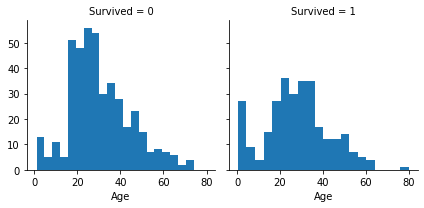

In [ ]:
g = sb.FacetGrid(df,col='Survived')
g.map(plt.hist,'Age',bins=20)

In [ ]:
df.loc[df['Age']<=15,'born']= 0
df.loc[(df['Age']>15)&(df['Age']<=30),'born']= 1
df.loc[(df['Age']>30)&(df['Age']<=50),'born']= 2
df.loc[(df['Age']>50)&(df['Age']<=75),'born']= 3
df.loc[(df['Age']>75),'born']= 4
df.loc[df['born'].isnull(),'born']=5
df.drop(['Age'],axis=1,inplace=True)

In [ ]:
df.loc[df['Fare']<=maxnotiii,'Fare'] = 0
df.loc[df['Fare']>maxnotiii,'Fare'] = 1

In [ ]:
df.loc[df['Embarked']=='S','Embarked'] = 0
df.loc[df['Embarked']=='C','Embarked'] = 1
df.loc[df['Embarked']=='Q','Embarked'] = 2

In [ ]:
df.drop(['SibSp','Parch'],axis=1,inplace=True)

In [ ]:
df.loc[df['Fare'].isnull(),'Fare']=0
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Fare         418 non-null    float64
 4   Embarked     418 non-null    object 
 5   isAlone      418 non-null    float64
 6   born         418 non-null    float64
dtypes: float64(3), int64(3), object(1)
memory usage: 23.0+ KB


In [ ]:
df = df.dropna()

In [ ]:
X_test = X_test.dropna()

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    417 non-null    int64  
 1   Sex       417 non-null    int64  
 2   SibSp     417 non-null    int64  
 3   Parch     417 non-null    int64  
 4   Fare      417 non-null    float64
 5   Embarked  417 non-null    object 
 6   isAlone   417 non-null    float64
 7   born      417 non-null    float64
dtypes: float64(3), int64(4), object(1)
memory usage: 29.3+ KB


In [ ]:
X_train = df.iloc[:,2:]
y_train = df.iloc[:,1:2]

In [ ]:
X_test = df.iloc[:,1:]

In [ ]:
X_test

,Pclass,Sex,Fare,Embarked,isAlone,born
0,3,1,0.0,2,1.0,2.0
1,3,0,0.0,0,0.0,2.0
2,2,1,0.0,2,1.0,3.0
3,3,1,0.0,0,1.0,1.0
4,3,0,0.0,0,0.0,1.0
...,...,...,...,...,...,...
413,3,1,0.0,0,1.0,5.0
414,1,0,1.0,1,1.0,2.0
415,3,1,0.0,0,1.0,2.0
416,3,1,0.0,0,1.0,5.0


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    889 non-null    int64  
 1   Sex       889 non-null    int64  
 2   Fare      889 non-null    float64
 3   Embarked  889 non-null    object 
 4   isAlone   889 non-null    float64
 5   born      889 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [ ]:
df = pd.read_csv('test.csv')

In [ ]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  889 non-null    int64
dtypes: int64(1)
memory usage: 13.9 KB


In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(max_depth=10)
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

84.36

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


84.36

In [ ]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
acc_sgd

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


74.69

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


82.68

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


79.75

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


79.42

In [ ]:
pd.DataFrame(Y_pred)

,0
0,0
1,0
2,0
3,0
4,0
...,...
413,0
414,1
415,0
416,0


In [ ]:
X_train

,Pclass,Sex,Fare,Embarked,isAlone,born
0,3,1,0.0,0,0.0,1.0
1,1,0,0.0,1,0.0,2.0
2,3,0,0.0,0,1.0,1.0
3,1,0,0.0,0,0.0,2.0
4,3,1,0.0,0,1.0,2.0
...,...,...,...,...,...,...
886,2,1,0.0,0,1.0,1.0
887,1,0,0.0,0,1.0,1.0
888,3,0,0.0,0,0.0,5.0
889,1,1,0.0,1,1.0,1.0


In [ ]:
pd.DataFrame(Y_pred)

,0
0,0
1,0
2,0
3,0
4,0
...,...
413,0
414,1
415,0
416,0


In [ ]:
submission = pd.DataFrame({
        "PassengerId": df["PassengerId"],
        "Survived": Y_pred
    })

In [ ]:
submission.to_csv('submission1.csv')